In [84]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from LensSystem import LensSystem, Ray

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
lsys = LensSystem('data/dgauss50mm.csv')
print(lsys)

          r     h        d    ior
0    29.475  25.2   3.7600  1.670
1    84.830  25.2   0.1200  1.000
2    19.275  23.0   4.0250  1.670
3    40.770  23.0   3.2750  1.699
4    12.750  18.0   5.7050  1.000
5     0.000  17.1   4.5000  1.000
6   -14.495  17.0   1.1800  1.603
7    40.770  20.0   6.0650  1.658
8   -20.385  20.0   0.1900  1.000
9   437.065  20.0   3.2200  1.717
10  -39.730  20.0  36.1059  1.000


In [86]:
rays = lsys.raytrace_from_object(Ray(np.array([0, 1, -1000]), np.array([0, 0, 1])))
rays

[origin: [    0     1 -1000], direction: [0 0 1],
 origin: [  0.           1.         -68.12893159], direction: [-0.         -0.01361615  0.9999073 ],
 origin: [  0.           0.94895732 -64.38059204], direction: [-0.         -0.01524392  0.9998838 ],
 origin: [  0.           0.94685399 -64.2426296 ], direction: [-0.         -0.02884308  0.99958395],
 origin: [  0.           0.83113927 -60.2324273 ], direction: [-0.         -0.02869874  0.99958811],
 origin: [  0.           0.73674378 -56.94459626], direction: [-0.         -0.00833916  0.99996523],
 origin: [  0.          0.6893449 -51.2609   ], direction: [-0.         -0.00833916  0.99996523],
 origin: [  0.           0.65193973 -46.77556853], direction: [0.         0.01173173 0.99993118],
 origin: [  0.           0.66602006 -45.57545957], direction: [0.         0.01080045 0.99994167],
 origin: [  0.           0.7313281  -39.52902271], direction: [ 0.         -0.00571145  0.99998369],
 origin: [  0.           0.73016447 -39.32529009],

In [87]:
# 像面との交点
t = -rays[-1].origin[2] / rays[-1].direction[2]
p = rays[-1].position(t)
print(p)

[ 0.0000000e+00 -4.4162616e-05  0.0000000e+00]


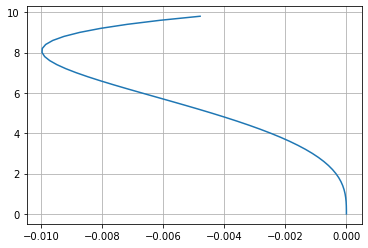

In [90]:
# 球面収差のプロット
graph_x = []
graph_y = []
for i in range(50):
    u = (i / 50)
    height = 10 * u
    graph_y.append(height)

    # レイトレ
    rays = lsys.raytrace_from_object(Ray(
        np.array([0, height, -1000]),
        np.array([0, 0, 1])
        ))
    
    # 像面との交点
    t = -rays[-1].origin[2] / rays[-1].direction[2]
    p = rays[-1].position(t)
    graph_x.append(p[1])

plt.plot(graph_x, graph_y)
plt.grid()